In [1]:
import gensim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from gensim.models import word2vec
import nltk,re
from tqdm import tqdm

In [154]:
data=pd.read_csv('/content/sexinsm 2.0.csv')
print(data.head())

                           index        id  \
0  @MT8_9 http://t.co/QHo6dhumjc    sexism   
1                    #yesallmen        NaN   
2                       6.85E+17  6.85E+17   
3                       6.18E+17  6.18E+17   
4                       5.95E+17  5.95E+17   

                                                Text Annotation  oh_label  
0                                                  1        NaN       NaN  
1                                                NaN        NaN       NaN  
2  Chloe and kelly ...i seriously hate those girl...     sexism       1.0  
3  Sorry but #JessieJ on #thevoiceau is being a r...     sexism       1.0  
4  Ash found her inner bogun #whistle #fingersint...     sexism       1.0  


In [155]:
data=data.drop(['index','id','Annotation'], axis=1, inplace=False)
print(data.head())

                                                Text  oh_label
0                                                  1       NaN
1                                                NaN       NaN
2  Chloe and kelly ...i seriously hate those girl...       1.0
3  Sorry but #JessieJ on #thevoiceau is being a r...       1.0
4  Ash found her inner bogun #whistle #fingersint...       1.0


In [156]:
data.isnull().sum()


,0
Text,8017
oh_label,8019


In [105]:
data.shape

(13471, 2)

In [157]:
data=data.dropna(axis=0)

In [158]:
data.isnull().sum()

,0
Text,0
oh_label,0


In [108]:
data.shape

(3442, 2)

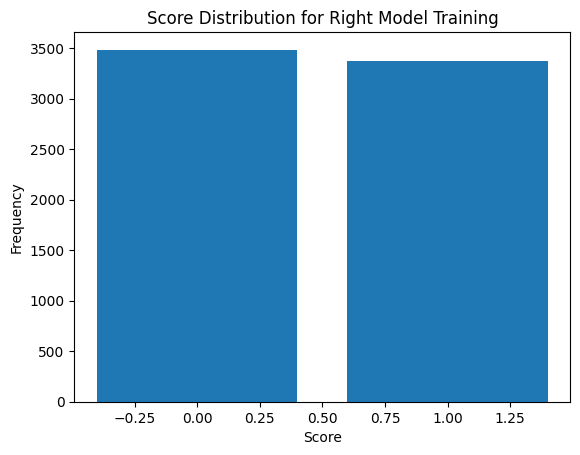

In [159]:
score_counts = data['oh_label'].value_counts()

plt.bar(score_counts.index, score_counts.values)

plt.title('Score Distribution for Right Model Training')
plt.xlabel('Score')
plt.ylabel('Frequency')


plt.show()


In [160]:
score_counts = data['oh_label'].value_counts()
print(score_counts)

oh_label
0.0    3485
1.0    3377
Name: count, dtype: int64


In [ ]:
#data2 = data.sample(n=500, random_state=564).reset_index(drop=True)
#print(data2.shape)

(500, 2)


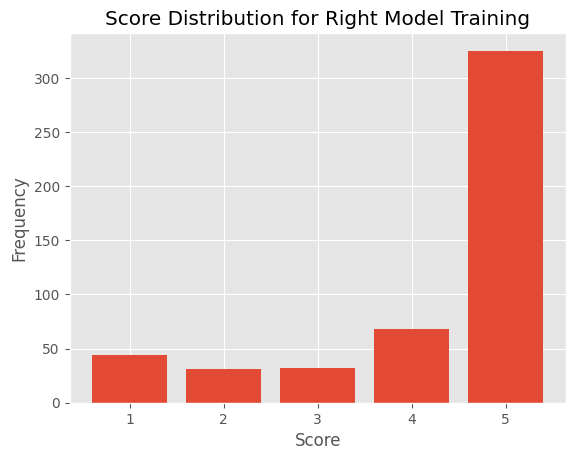

In [ ]:
# score_counts = data2['Score'].value_counts()

# plt.bar(score_counts.index, score_counts.values)

# plt.title('Score Distribution for Right Model Training')
# plt.xlabel('Score')
# plt.ylabel('Frequency')


# plt.show()


In [84]:
from nltk.stem import WordNetLemmatizer
lm=WordNetLemmatizer()
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [161]:
data.reset_index(drop=True, inplace=True)  # Reset index if necessary

In [56]:
print(data.head())

                                                Text  oh_label
0  Chloe and kelly ...i seriously hate those girl...       1.0
1  Sorry but #JessieJ on #thevoiceau is being a r...       1.0
2  Ash found her inner bogun #whistle #fingersint...       1.0
3                                   STFU drasko #MKR       0.0
4      OMG SHUT UP DRASKO AND BIANCA #MKR #FINALFIVE       0.0


In [162]:
corpus =[]
for i in tqdm(range(0,len(data))):
  review = re.sub('[^a-zA-Z]', ' ',data['Text'][i])
  review = review.lower()
  review = review.split()

  review = [lm.lemmatize(word) for word in review]
  review = ' '.join(review)
  corpus.append(review)

[[i,j,k] for i,j,k in zip(list(map(len,corpus)),corpus, data['Text']) if i<1]


100%|██████████| 6862/6862 [00:01<00:00, 5903.95it/s]


[]

In [ ]:
corpus

['product arrived labeled a jumbo salted peanut the peanut were actually small sized unsalted not sure if this wa an error or if the vendor intended to represent the product a jumbo',
 'this is a confection that ha been around a few century it is a light pillowy citrus gelatin with nut in this case filbert and it is cut into tiny square and then liberally coated with powdered sugar and it is a tiny mouthful of heaven not too chewy and very flavorful i highly recommend this yummy treat if you are familiar with the story of c s lewis the lion the witch and the wardrobe this is the treat that seduces edmund into selling out his brother and sister to the witch',
 'if you are looking for the secret ingredient in robitussin i believe i have found it i got this in addition to the root beer extract i ordered which wa good and made some cherry soda the flavor is very medicinal',
 'i got a wild hair for taffy and ordered this five pound bag the taffy wa all very enjoyable with many flavor waterm

In [135]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

In [163]:
words = []
for sent in tqdm(corpus):
  sent_token=sent_tokenize(sent)
  for sent in sent_token:
    words.append(simple_preprocess(sent))



100%|██████████| 6862/6862 [00:00<00:00, 34780.25it/s]


In [164]:
model = gensim.models.Word2Vec(words)

In [61]:
model.corpus_count

10790

In [ ]:
model.epochs

5

In [165]:
model.wv.similar_by_word('good')

[('too', 0.9995970129966736),
 ('male', 0.9995653629302979),
 ('also', 0.9995178580284119),
 ('after', 0.9995061755180359),
 ('by', 0.9994889497756958),
 ('now', 0.9994843006134033),
 ('man', 0.9994779825210571),
 ('lot', 0.9994651079177856),
 ('very', 0.9994638562202454),
 ('great', 0.9994637966156006)]

In [166]:
def avg_word2vec(doc):
  return np.mean([model.wv[word] for word in doc if word in model.wv.index_to_key],axis=0)

In [167]:
x=[]
for i in tqdm(range(len(words))):
  try:
    x.append(avg_word2vec(words[i]))
  except RuntimeError:
    print("Empty value at",i)


  0%|          | 0/6862 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 6862/6862 [00:01<00:00, 4272.85it/s]


In [25]:
len(x[0])

100

In [ ]:
x[187996]

array([-0.49974802, -0.44527748,  0.06347239,  1.0080822 ,  0.30461732,
       -0.139523  ,  0.0200932 ,  0.4618173 ,  0.20140333,  0.06330311,
        0.5942524 ,  0.3803974 , -0.12024453,  0.39708978,  0.35669416,
        0.05792651, -0.07046732, -0.02330654,  0.26978454, -0.1189208 ,
       -0.01098801, -0.24012703,  0.38596523, -0.9235825 , -0.37061086,
        0.40876988, -0.94970185,  0.9625453 , -0.4888004 ,  0.14625035,
       -0.88343763, -0.26519847, -0.23040912,  0.27750388, -0.49075532,
       -0.09330855, -0.2465411 ,  0.02307524,  0.0254334 , -0.09688363,
        0.3206263 , -0.4967484 ,  0.07912514,  0.1759896 ,  0.12755802,
       -0.3140006 , -0.40377095, -0.4436096 , -0.32271177, -0.8424743 ,
        0.2727474 ,  0.1373779 , -0.02169207, -0.35193858, -0.15931535,
        0.07904091,  0.6685979 , -0.23789161,  0.32542768, -0.2431963 ,
       -0.3761871 , -0.7691969 ,  0.40237498, -0.08032843,  0.28335744,
       -0.10232869, -0.03971063,  0.3860644 , -0.64901966, -1.08

In [168]:


# Filter out invalid entries (e.g., NaN or None)
x_cleaned = [vec for vec in x if vec is not None and not np.isnan(vec).any()]

print(f"Original length: {len(x)}, Cleaned length: {len(x_cleaned)}")


Original length: 6862, Cleaned length: 6828


In [169]:
x=x_cleaned

In [170]:
y=data['oh_label']
print(y.head())

0    1.0
1    1.0
2    1.0
3    0.0
4    0.0
Name: oh_label, dtype: float64


In [171]:
data2 = []
for i in tqdm(range(0, len(x))):
    data2.append(x[i].reshape(1, -1))


df = pd.DataFrame(np.vstack(data2))


100%|██████████| 6828/6828 [00:00<00:00, 551019.89it/s]


In [172]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.211810,0.520499,0.361209,0.362589,0.321373,-0.498412,0.327130,0.854412,-0.542333,-0.322605,...,0.494427,0.337969,-0.306034,0.076189,0.415156,0.164502,0.148274,-0.328644,0.130637,-0.249832
1,-0.228067,0.527160,0.338080,0.355056,0.295902,-0.526250,0.343776,0.869178,-0.557153,-0.327498,...,0.490248,0.351983,-0.311349,0.054437,0.443385,0.156947,0.145990,-0.332449,0.140750,-0.262022
2,-0.146251,0.409861,0.294264,0.270976,0.273514,-0.366989,0.262455,0.645375,-0.389868,-0.253749,...,0.389697,0.258939,-0.216012,0.068811,0.301925,0.133305,0.104577,-0.256037,0.081440,-0.175863
3,-0.195158,0.511547,0.356582,0.329066,0.308447,-0.478768,0.326994,0.813723,-0.497032,-0.307528,...,0.465827,0.311758,-0.277200,0.059671,0.399831,0.158964,0.138669,-0.311712,0.112989,-0.228765
4,-0.052114,0.483757,0.391645,0.057371,0.601462,-0.320118,0.351175,0.820011,-0.121032,-0.571429,...,0.622529,0.369777,0.051671,0.390067,0.250091,0.185710,-0.135082,-0.177044,-0.175276,0.227369


In [173]:
df['output']=y

In [174]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,output
0,-0.211810,0.520499,0.361209,0.362589,0.321373,-0.498412,0.327130,0.854412,-0.542333,-0.322605,...,0.337969,-0.306034,0.076189,0.415156,0.164502,0.148274,-0.328644,0.130637,-0.249832,1.0
1,-0.228067,0.527160,0.338080,0.355056,0.295902,-0.526250,0.343776,0.869178,-0.557153,-0.327498,...,0.351983,-0.311349,0.054437,0.443385,0.156947,0.145990,-0.332449,0.140750,-0.262022,1.0
2,-0.146251,0.409861,0.294264,0.270976,0.273514,-0.366989,0.262455,0.645375,-0.389868,-0.253749,...,0.258939,-0.216012,0.068811,0.301925,0.133305,0.104577,-0.256037,0.081440,-0.175863,1.0
3,-0.195158,0.511547,0.356582,0.329066,0.308447,-0.478768,0.326994,0.813723,-0.497032,-0.307528,...,0.311758,-0.277200,0.059671,0.399831,0.158964,0.138669,-0.311712,0.112989,-0.228765,0.0
4,-0.052114,0.483757,0.391645,0.057371,0.601462,-0.320118,0.351175,0.820011,-0.121032,-0.571429,...,0.369777,0.051671,0.390067,0.250091,0.185710,-0.135082,-0.177044,-0.175276,0.227369,0.0


In [175]:
df.dropna(inplace=True)

In [176]:
df.isnull().sum()

,0
0,0
1,0
2,0
3,0
4,0
...,...
96,0
97,0
98,0
99,0


In [177]:
x=df.drop('output',axis=1)
y=df['output']

In [178]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

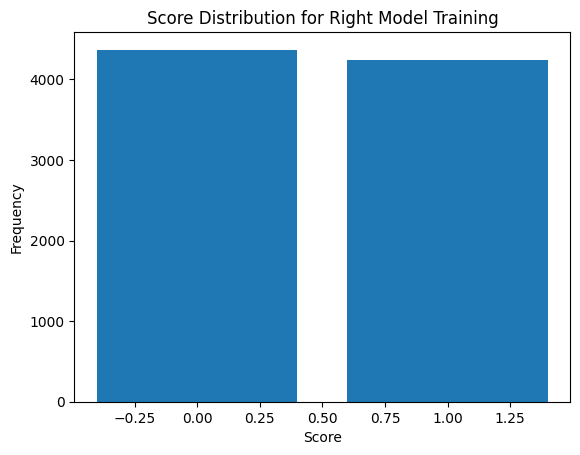

In [74]:
score_counts = y_train.value_counts()

plt.bar(score_counts.index, score_counts.values)

plt.title('Score Distribution for Right Model Training')
plt.xlabel('Score')
plt.ylabel('Frequency')


plt.show()


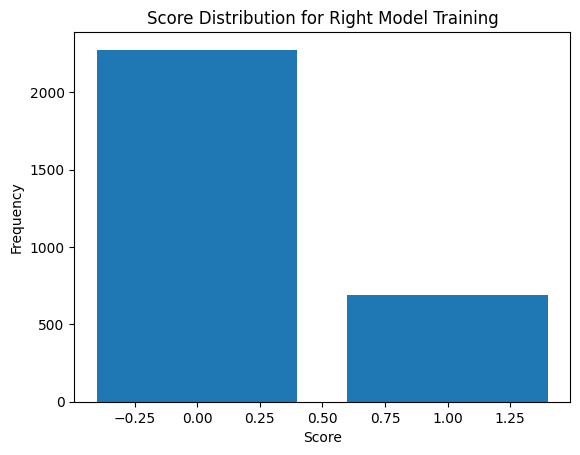

In [151]:
score_counts = y_test.value_counts()

plt.bar(score_counts.index, score_counts.values)

plt.title('Score Distribution for Right Model Training')
plt.xlabel('Score')
plt.ylabel('Frequency')


plt.show()

In [179]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(x_train,y_train)
y_pred=RF.predict(x_test)

In [180]:
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.5578330893118595
              precision    recall  f1-score   support

         0.0       0.54      0.65      0.59       662
         1.0       0.59      0.47      0.53       704

    accuracy                           0.56      1366
   macro avg       0.56      0.56      0.56      1366
weighted avg       0.56      0.56      0.55      1366

